In [1]:
import pandas as pd
import numpy as np
import skimage.io as io
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from matplotlib import pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
train_Y = pd.read_csv("data/train.csv")

batch_size = 128
num_classes = 10
epochs = 12

In [3]:
coll = io.imread_collection('./data/train_images/*.png')

In [4]:
def mark(num):
    io.imshow(coll[num-1])
    loca = train_Y.loc[train_Y['FileName']==str(num)+'.png']
    left = loca['Left']
    top = loca['Top']
    right = loca['Width']+left
    bottom = loca['Height']+top
    
    plt.plot(left,top,'yo')
    plt.plot(left,bottom,'bo')
    plt.plot(right,top,'ro')
    plt.plot(right,bottom,'go')
    plt.show()

In [5]:
def markcanny(num):
    io.imshow(feature.canny(color.rgb2gray(coll[num-1]), sigma=0.1))
    loca = train_Y.loc[train_Y['FileName']==str(num)+'.png']
    left = loca['Left']
    top = loca['Top']
    right = loca['Width']+left
    bottom = loca['Height']+top
    
    plt.plot(left,top,'yo')
    plt.plot(left,bottom,'bo')
    plt.plot(right,top,'ro')
    plt.plot(right,bottom,'go')
    plt.show()

In [7]:
train_loc = train_Y[['Left','Top','Width','Height']]
train_Y.head()

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


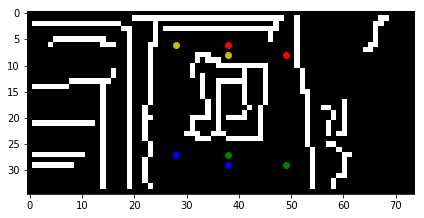

In [12]:
markcanny(6)